<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/pytorch3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install sklearn
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#문제 1. 사인함수 예측하기

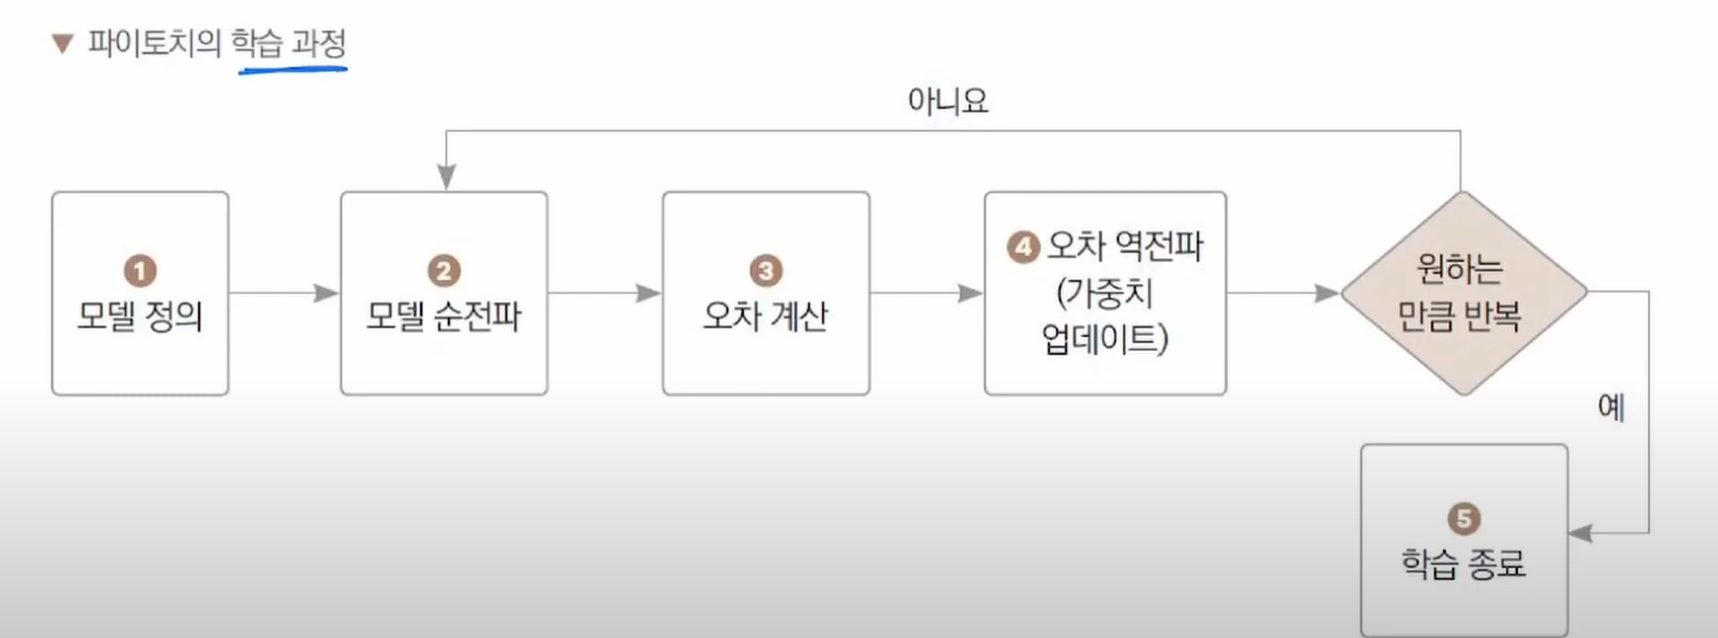

In [1]:
#학습하기 전의 사인함수 모델
import math
import torch
import matplotlib.pyplot as plt

#-pi부터 pi 사이에서 점을 1000개 추출함
x = torch.linspace(-math.pi, math.pi, 1000)

#실제 사인곡선에서 추출한 값으로 y만들기
y = torch.sin(x)

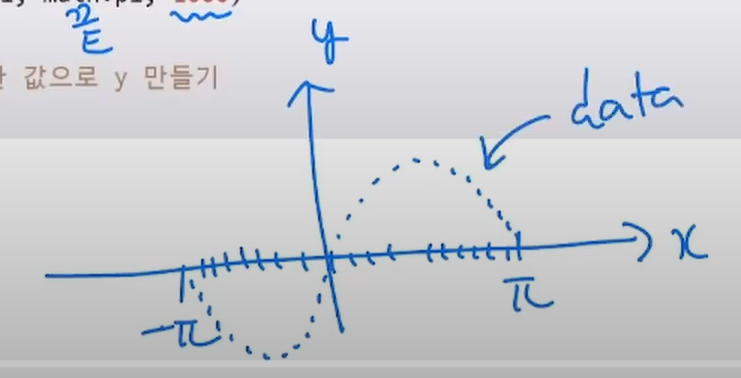

In [2]:
#예측 사인곡선에 이용할 임의의 가중치를 뽑아 y만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

#사인함수를 근사할  3차 다항식 정의
y_random = a * x**3 + b * x**2 + c * x + d

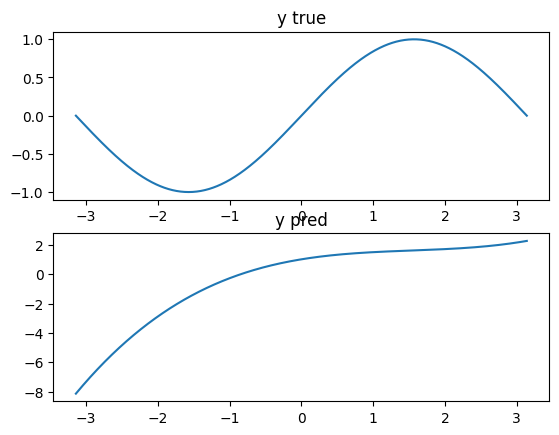

In [3]:
#실제 사인 곡선을 실제 y값으로 만들기
plt.subplot(2,1,1)
plt.title("y true")
plt.plot(x,y)

#예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2,1,2)
plt.title("y pred")
plt.plot(x,y_random)

#실제와 예측 사인곡선 출력하기
plt.show()

epoch1 loss:20.11829376220703
epoch101 loss:17.62628746032715
epoch201 loss:15.53007698059082
epoch301 loss:13.766813278198242
epoch401 loss:12.283601760864258
epoch501 loss:11.03594970703125
epoch601 loss:9.986444473266602
epoch701 loss:9.103620529174805
epoch801 loss:8.360993385314941
epoch901 loss:7.736308574676514
epoch1001 loss:7.2108259201049805
epoch1101 loss:6.768790245056152
epoch1201 loss:6.396951675415039
epoch1301 loss:6.084158897399902
epoch1401 loss:5.8210368156433105
epoch1501 loss:5.599697113037109
epoch1601 loss:5.413503646850586
epoch1701 loss:5.256875038146973
epoch1801 loss:5.12511682510376
epoch1901 loss:5.014281272888184


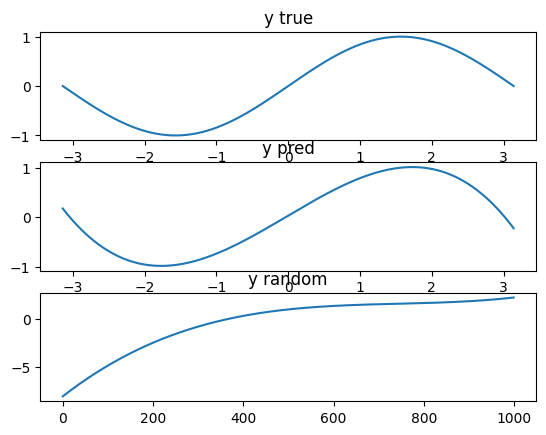

In [5]:
#가중치를 학습시켜서 사인곡선 그리기
learning_rate = 1e-6

for epoch in range(2000):
  y_pred = a * x**3 + b * x**2 + c*x + d

  loss = (y_pred - y).pow(2).sum().item()#손실정의
  if epoch % 100 == 0:
    print(f"epoch{epoch+1} loss:{loss}")

  grad_y_pred = 2.0 * (y_pred - y) #기울기의 미분값
  grad_a = (grad_y_pred * x**3).sum()
  grad_b = (grad_y_pred * x**2).sum()
  grad_c = (grad_y_pred * x).sum()
  grad_d = grad_y_pred.sum()

  a -= learning_rate * grad_a
  b -= learning_rate *grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

#실제 사인 곡선을 그리기
plt.subplot(3,1,1)
plt.title("y true")
plt.plot(x,y)

#예측한 가중치의 사인곡선을 그리기
plt.subplot(3,1,2)
plt.title("y pred")
plt.plot(x,y_pred)

#랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3,1,3)
plt.plot(y_random)
plt.title("y random")

plt.show()

#문제 2: 보스턴집값예측하기

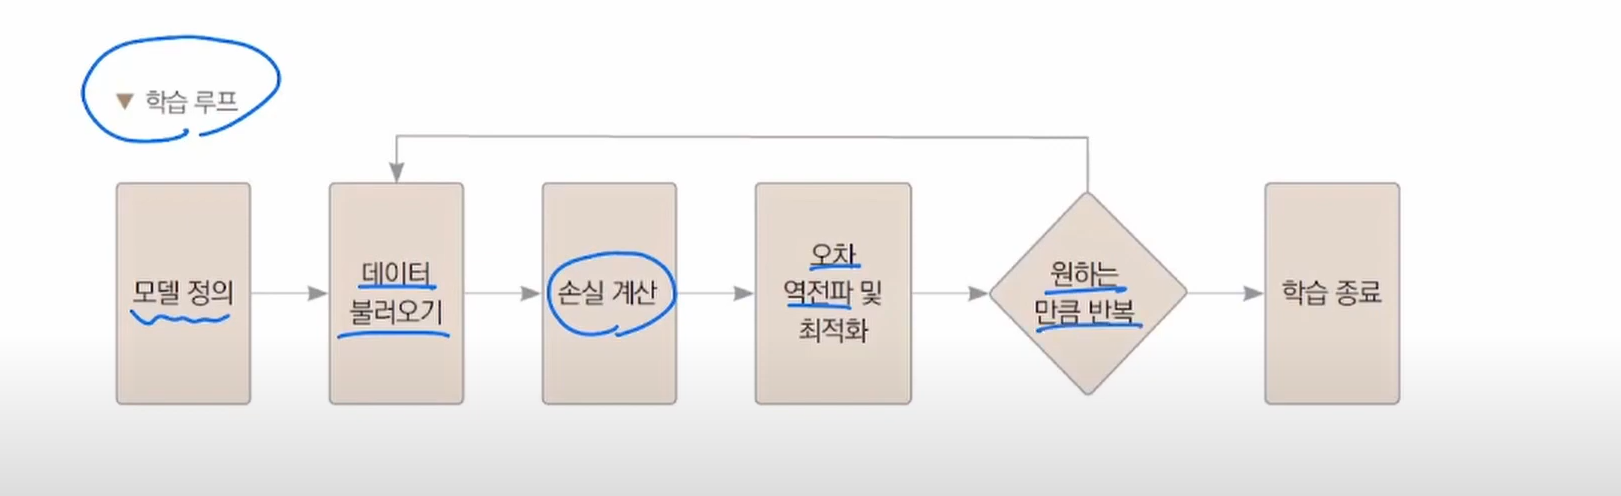

보는것과 같이 오류가 뜨는데 그냥 무시해도 된다고 한다.

In [13]:
from sklearn.datasets import load_boston

#보스턴집값 파일이 sklearn1.2버전부터 지워졌다함 코드만 작성

# 경고 무시(오류가 자꾸 떴는데 노트보니깐 그냥 무시해도 되는듯)
import warnings
warnings.filterwarnings('ignore')

dataset = load_boston() 
print(dataset.keys())   

ImportError: ignored

In [14]:
#데이터 불러오기
import pandas as pd
from sklearn.datasets import load_boston


dataset = load_boston()
dataFrame = pd.DataFrame(Dataset["data"]) #데이터 불러오기
dataFrame.columns = dataset["feature_names"]  #특징의 이름 불러오기
dataFrame["target"] = dataset["target"] #데이터 프레임에 정답추가

print(dataFrame.head())

ImportError: ignored

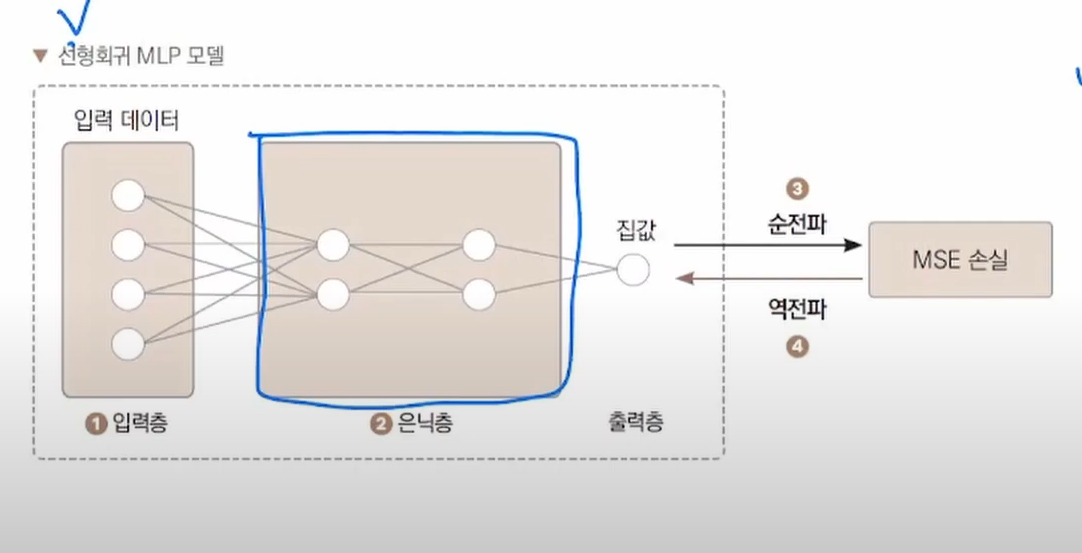

In [15]:
#선형회귀 MLP모델 설계
import torch
import torch.nn as nn

from torch.optim.adam import Adam
#모델 정의
model = nn.Sequential(
   nn.Linear(13, 100),
   nn.ReLU(),
   nn.Linear(100, 1)
)

X = dataFrame.iloc[:, :13].values #정답을 제외한 특징을 X에 입력
Y = dataFrame["target"].values    #데이터프레임의 target의 값을 추출

batch_size = 100
learning_rate = 0.001

#가중치를 수정하기 위한 최적화 정의
optim = Adam(model.parameters(), lr=learning_rate)


#에포크 반복
for epoch in range(200):

   #배치 반복
   for i in range(len(X)//batch_size):
       start = i*batch_size      #배치 크기에 맞게 인덱스를 지정
       end = start + batch_size


       #파이토치 실수형 텐서로 변환
       x = torch.FloatTensor(X[start:end])
       y = torch.FloatTensor(Y[start:end])

       optim.zero_grad() #가중치의 기울기를 0으로 초기화
       preds = model(x)  #모델의 예측값 계산
       loss = nn.MSELoss()(preds, y) #MSE 손실 계산
       loss.backward()#오차 역전파
       optim.step()#최적화 진행

   if epoch % 20 == 0:
       print(f"epoch{epoch} loss:{loss.item()}")

NameError: ignored

iteration : 1에포크를 반복시키는데 필요한 배치의 횟수

In [16]:
#모델 성능 평가
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction:{prediction.item()} real:{real}")

NameError: ignored

#문제3: 손글씨 분류하기

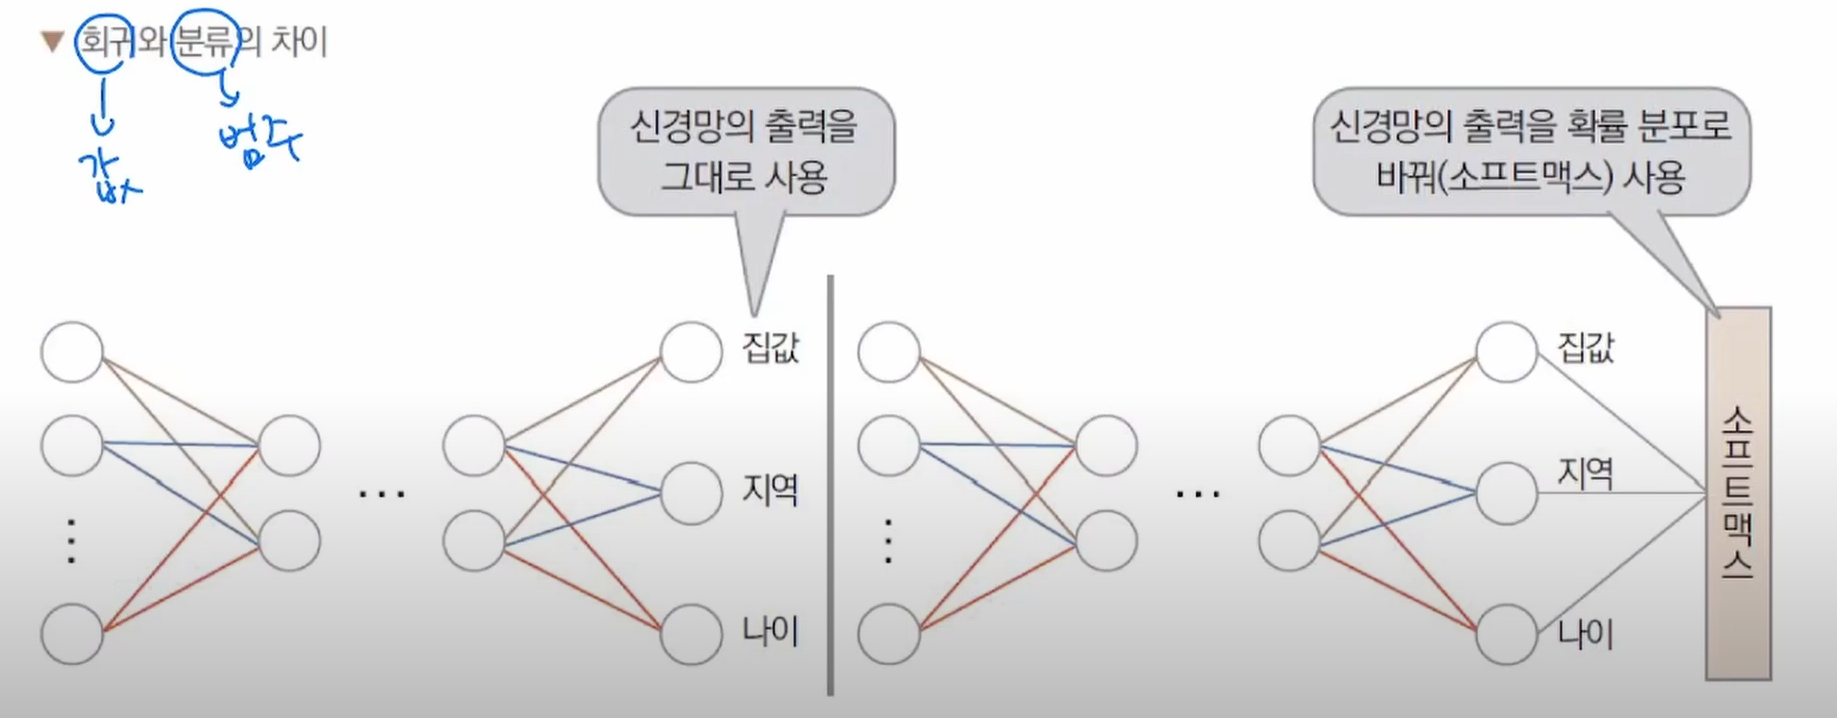

100%|██████████| 9912422/9912422 [00:00<00:00, 82109453.52it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65337483.18it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23206365.40it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14270059.00it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



60000
10000


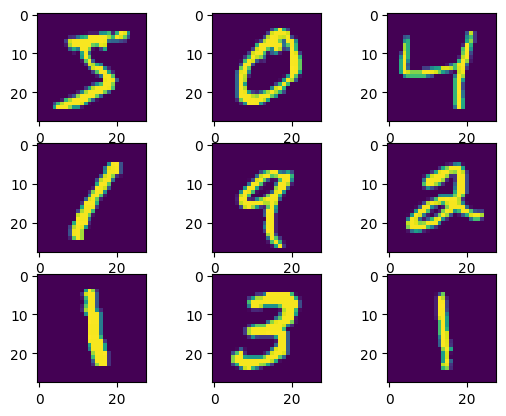

In [17]:
#손글씨 데이터 살펴보기
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

#학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())


print(len(training_data)) #학습에 사용할 데이터 개수
print(len(test_data))    #평가에 사용할 데이터 개수

for i in range(9): #샘플 이미지를 9개 출력
   plt.subplot(3, 3, i+1)
   plt.imshow(training_data.data[i])
plt.show()

In [18]:
#학습용 데이터와 평가용 데이터의 데이터로더 정의

from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
#데이터, 데이터 크기, 데이터를 섞는가 안섞는가의 유무

#평가용은 데이터를 섞을 필요가 없음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False) 

In [19]:
#손글시 분류모델 학습하기
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu" #학습에 사용할 프로세서를 지정

model = nn.Sequential(
   nn.Linear(784, 64),  #28*28*1 , 64개 출력
   nn.ReLU(),
   nn.Linear(64, 64),
   nn.ReLU(),
   nn.Linear(64, 10)  #0~9까지의 범주
)
model.to(device) #모델의 파라미터를 GPU로 보냄

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
   for data, label in train_loader:
       optim.zero_grad()
       #입력 데이터를 모델의 입력에 맞게 모양을 변환
       data = torch.reshape(data, (-1, 784)).to(device) #(32,784)
       preds = model(data)

       loss = nn.CrossEntropyLoss()(preds, label.to(device)) #손실 계산
       loss.backward()#오차 역전파
       optim.step()#최적화 진행

   print(f"epoch{epoch+1} loss:{loss.item()}")

torch.save(model.state_dict(), "MNIST.pth") #모델을 MNIST.pth라는 이름으로 저장

epoch1 loss:0.1284332275390625
epoch2 loss:0.1782720983028412
epoch3 loss:0.02460325136780739
epoch4 loss:0.030707543715834618
epoch5 loss:0.05709072947502136
epoch6 loss:0.18716873228549957
epoch7 loss:0.01949113979935646
epoch8 loss:0.02573392540216446
epoch9 loss:0.004683938808739185
epoch10 loss:0.01359681785106659
epoch11 loss:0.002072206698358059
epoch12 loss:0.06263076514005661
epoch13 loss:0.02741260454058647
epoch14 loss:0.000527852273080498
epoch15 loss:0.09856954962015152
epoch16 loss:0.003485682187601924
epoch17 loss:0.004077875521034002
epoch18 loss:0.00647510914131999
epoch19 loss:0.0035560615360736847
epoch20 loss:0.0020041470415890217


In [20]:
#모델 성능 평가

In [21]:
#모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0 #분류에 성공한 전체 개수

with torch.no_grad(): #기울기를 계산하지 않음
   for data, label in test_loader:
       data = torch.reshape(data, (-1, 784)).to(device)

       output = model(data.to(device))
       preds = output.data.max(1)[1] #모델의 예측값 계산
       #올바르게 분류한 개수
       corr = preds.eq(label.to(device).data).sum().item()
       num_corr += corr

   print(f"Accuracy:{num_corr/len(test_data)}") #분류 정확도를 출력

Accuracy:0.9756


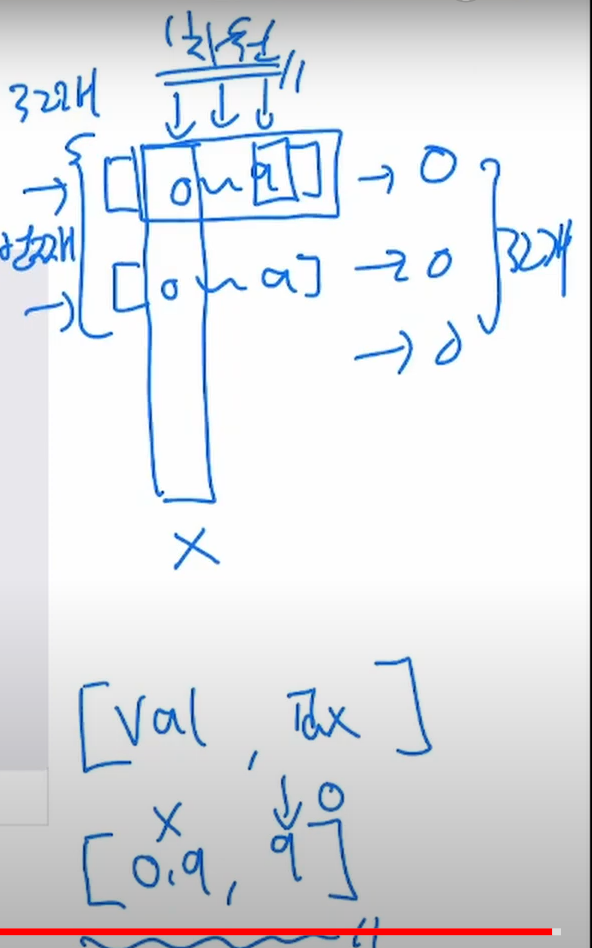